# Linear Regression with one variable
Now you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next. 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import csv

### Accessing and storing data from csv files

In [41]:
# Popultation in 10,000s
# Profit in 10,000$
population_train = []
profit_train = []
with open('Data/ex1data1.csv', newline='') as pop_profit_train:
    reader = csv.reader(pop_profit_train)
    for row in reader:
        population_train.append(float(row[0]));
        profit_train.append(float(row[1]));    
population_train = np.array(population_train)
profit_train = np.array(profit_train)    

### Plotting data points

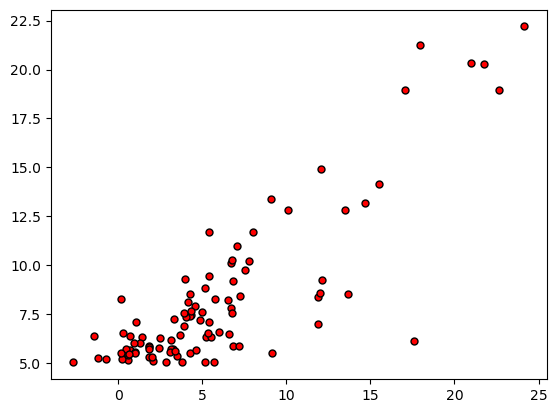

In [42]:
plt.plot(profit_train, population_train, 'ro', ms='5', mec='k')

### Our Model

1.1274013066401842 -3.2424682731733125


Text(0, 0.5, 'Profit in $10,000s')

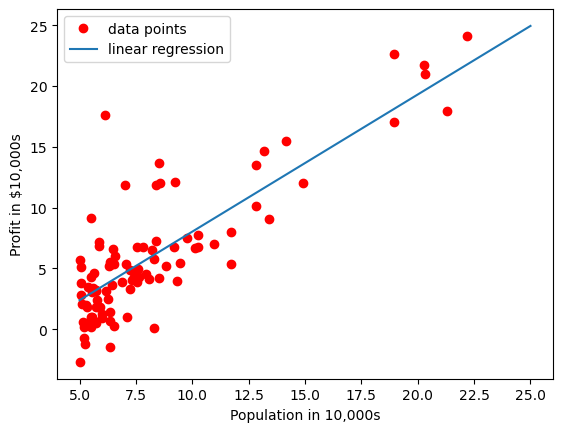

In [77]:
# predict model
def predict(x, w, b):
    return w*x + b

# cost function
def cost_func(x, y , w, b):
    n = len(x)
    total_error = 0.0
    for i in range(n):
        total_error += (w*x[i] + b - y[i])**2
    return total_error / n

# updating weights using grading descent
def update_weights(x, y, w, b, learning_rate):
    n = len(x)
    pd_w = 0
    pd_b = 0

    # Calculate the 'summation part' of partial derivatives
    for i in range(n):
        pd_w += x[i] * ((w*x[i] + b) - y[i])
        pd_b += (w*x[i] + b)- y[i]

    w -= learning_rate * (pd_w/n)
    b -= learning_rate * (pd_b/n)

    return w, b

# training
def training_model(x, y, w, b, learning_rate, total_iterations):
    
    for i in range(total_iterations):
        w, b = update_weights(x, y, w, b, learning_rate)
    
    return w, b

# testing / plot the damn predict model
w, b = training_model(population_train, profit_train, 0, 0, 0.02, 500)

print(w, b)

model_x = np.linspace(5, 25, 50)
model_y = predict(model_x, w, b)

plt.plot(population_train, profit_train, 'ro')
plt.plot(model_x, model_y)
plt.legend(['data points', 'linear regression'])
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')